### Background on the dataset.

The Heart Disease Dataset was obtained from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Heart+Disease). The full data set contains 76 attributes; however, the data set used below only includes a subset of 14 attributes from a narrower data set used in publications resulting from this data. The data used below is the Cleveland reprocessed data, in which personal identifiable information (such as names and social security numbers) have been removed.

In [1]:
import pandas as pd
import numpy as np
#import cufflinks as cf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import and clean data.

In [13]:
data = pd.read_csv('C:/Users/yakan/OneDrive/Documents/Thinkful/DS_Bootcamp/Unit1_data_and_analysis_ds_for_investigations/U1_capstone/processed.cleveland.csv',
                  header = None)

#### Insert column names

* sex: 1=male
* cp: chest pain type (1. typical angina 2. atypical angina 3. non-anginal pain 4.asymptomatic)
* restbp: resting bp
* chol: cholesterol in mg/dL
* fbs: fasting blood sugar > 100 mg/dL (1=true)
* restecg: resting electrocardiogram (0=normal; 1=abnormal; 2=definite issues)
* maxhr: max heart rate achieved
* exang: exercise induced angina (1=yes)
* num:diagnosis of heart disease

In [14]:
data.columns = ['age', 'sex', 'cp', 'restbps', 'chol', 'fbs', 'restecg',
                'maxhr', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

In [15]:
data.head(4)

,age,sex,cp,restbps,chol,fbs,restecg,maxhr,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0


### Preliminary look at the data and data reprocessing.

In [16]:
data.describe()

,age,sex,cp,restbps,chol,fbs,restecg,maxhr,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [17]:
data.isnull().sum()

age        0
sex        0
cp         0
restbps    0
chol       0
fbs        0
restecg    0
maxhr      0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
num        0
dtype: int64

There is a wide range of ages present in this group of individuals (29 to 77), as well as a variety of other variables on biometrics, such as blood pressure, blood sugar, cholesterol, and other metrics. The group includes both men and women.

I decided to break up the continuous 'age' variable into a categorical variable to make it easier to observe changes in the biometric variables that may be associated with age.

In [18]:
#break up age into age groups
bucket_array = np.arange(20, 80, 10)
data['age_category'] = pd.cut(data['age'], bucket_array)

In [19]:
data.head(4)

,age,sex,cp,restbps,chol,fbs,restecg,maxhr,exang,oldpeak,slope,ca,thal,num,age_category
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,"(60, 70]"
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,"(60, 70]"
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,"(60, 70]"
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,"(30, 40]"


### Data analysis.

### Is there any association between levels of cholesterol and resting blood pressure?

Text(445.88320650609165, 0.5, 'Cholesterol Level')

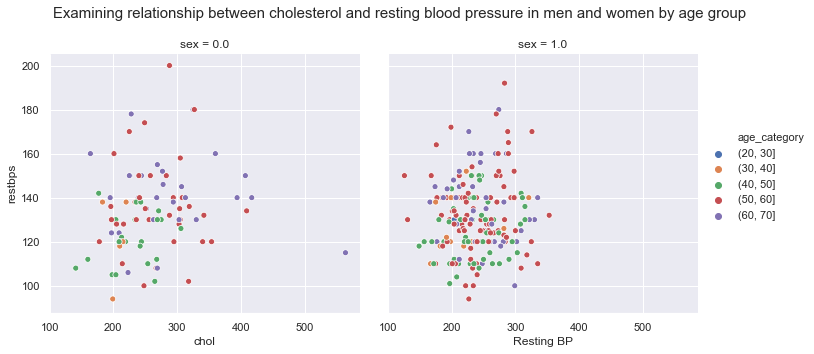

In [36]:
#look at variables of interest - chol, fbs, restbps
sns.set()
first_plot = sns.relplot(x = 'chol',
                         y = 'restbps',
                         col = 'sex',
                         hue = 'age_category',
                         data = data)
plt.subplots_adjust(top = .85)
first_plot.fig.suptitle('Examining relationship between cholesterol and resting blood pressure in men and women by age group',
                        fontsize = 15)
#plt.xlabel('Resting BP')
#plt.ylabel('Cholesterol Level')

Based on the graph, it does not seem like there is much correlation between cholesterol levels and resting blood pressure rates in both men and women. In general, for both men and women, resting blood pressure rates and cholesterol levels seem to get higher with age.

Let's examine the correlation between all of the variables with a heat map.

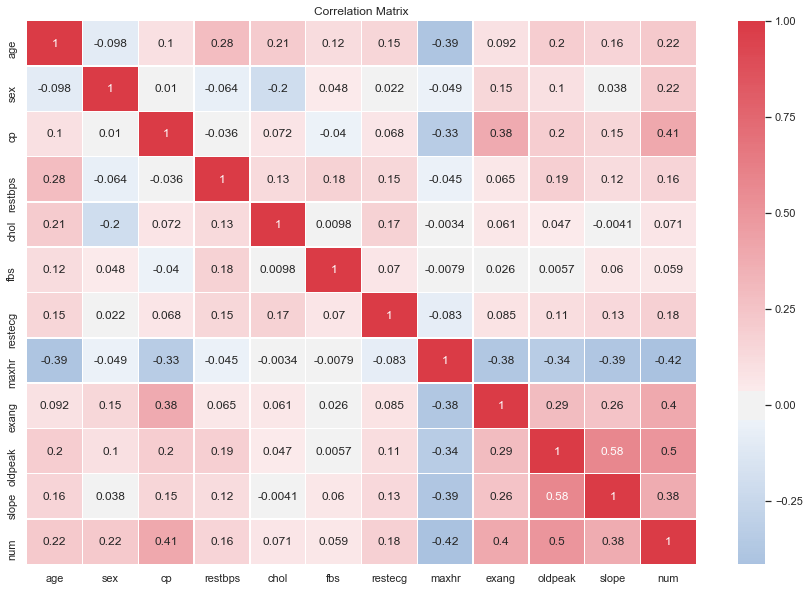

In [21]:
corr = data.corr()
cmap = sns.diverging_palette(250, 10, as_cmap=True)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            linewidths=.5, annot=True)
plt.title("Correlation Matrix")
plt.show()

The correlation heat map confirms that there is no strong correlation between resting blood pressure and cholesterol levels. It also shows that none of the other variables in the data set are very strongly correlated.

### Exploring elevated blood sugar, cholesterol levels, and resting blood pressure levels.

### Let's look at how many individuals in each age group and gender group have elevated levels of blood sugar.

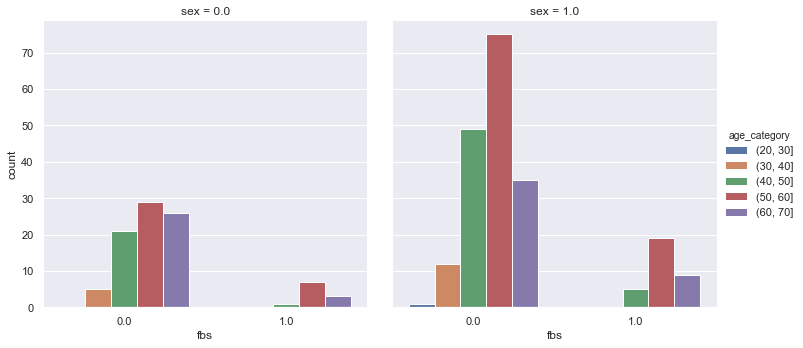

In [34]:
sns.catplot(x = 'fbs',
            hue = 'age_category',
            col = 'sex',
            data = data,
            kind = 'count')
#height=4, aspect=.7)

Here one of the main takeaways is that there aren't equal numbers of men and women in this data set, so it isn't possible to conclude if there differences in the counts between these groups are actually significant without further tests.

However, it seems that, in both males and females, elevated blood sugar levels do not occur until the age of 40 (for this data set).

### Let's look at blood pressure and cholesterol levels by group.

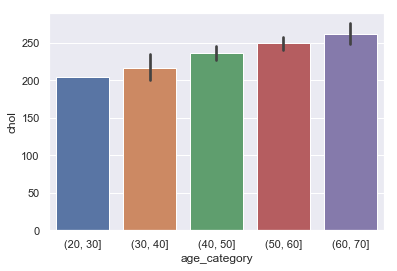

In [44]:
sns.barplot(x = 'age_category',
            y = 'chol',
            data = data)
#height=4, aspect=.7)

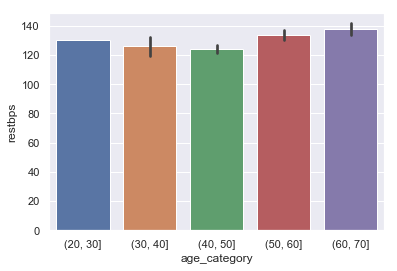

In [46]:
sns.barplot(x = 'age_category',
            y = 'restbps',
            data = data)

For the individuals in our data set, cholesterol levels increase with age much more so than resting blood pressure readings.

### Experimental proposal.

#### Setting the stage.
Let's pretend we have a company that designed a an app that aims to inspire healthy food choices and promotes more daily activity. They would like to test the efficacy of that app on a group of people. The following describes that experimental scenario.

##### The hypothesis.
The company is proposing that their health app will lead to healthier lifestyles of its users. The experimantal hypothesis is that app users will have reduced rates of blood pressure and cholesterol levels after three months of using the app. The null hypothesis is that there will be no change in health measures between individuals using the app and individuals not using the app.

#### Randomization and the roll out plan.

Prior to the beginning of the experiment, the app will be tested internall by a few people to make sure that it sends text or email reminders of healthy eating and increased daily activity, as planned. There will also be a 'placebo' app that will send reminders about the weather and this app will be disseminated to the control group to equalize the technology experience between the two groups.

The group of individuals will consist of folks who have enrolled in the heart study cohort (the cleveland data set) and for which we already have biometric data that will be used as a baseline for the experiment. The individuals will be randomized into two groups - one group will receive reminders from the health app and the other 'reminders' about the weather.

The groups will be selected completely at random to ensure that there is no randomization or selection bias in this experimental design.

##### The roll out plan.
The roll out plan will initially include a test phase where the app and the 'placebo' app gets disseminated to 5% of the participants in both the test and control groups to ensure that any issues with app usability or unanticipated questions may be resolved before the app is rolled out to the full group of the participants.

#### Success metrics.
The success of the health app will be measured from the blood pressure and cholesterol level differences in both groups, collected three months of app use. The change in blood pressure level and cholesterol level for each person will be computed as the difference between the levels obtained at study onset minus levels measured after three months of app use.

The change metrics will be compared between the test and control group participants to evaluate if the differences are statistically significant with a t test.